### Unstructured Data Analysis – Assignment 1

In [1]:
.libPaths("/home/rstudio/R/x86_64-pc-linux-gnu-library/3.4")

In [32]:
library(twitteR)
library(tm)
library(xts)
library(wordcloud)
library(RColorBrewer)
library(tidyverse)
library(ggplot2)
library(stringr)

In [3]:
api_key <- ""
api_secret <- ""
token <- ""
token_secret <- ""
setup_twitter_oauth(api_key, api_secret, token, token_secret)

[1] "Using direct authentication"


In [4]:
ds <- searchTwitter("#datascience", n=500, lang="en")
ds_df = twListToDF(ds)
ds_df$text <- sapply(ds_df$text, function(x) iconv(enc2utf8(x), sub = "byte"))

In [16]:
ds_data <- ds_df %>%
  group_by(created = cut(created, breaks = "5 min")) %>%
  summarize(total = sum(retweetCount))

### 1a. Hour wise or minute wise (depending upon the scrapped tweets) number of tweets - draw a line chart

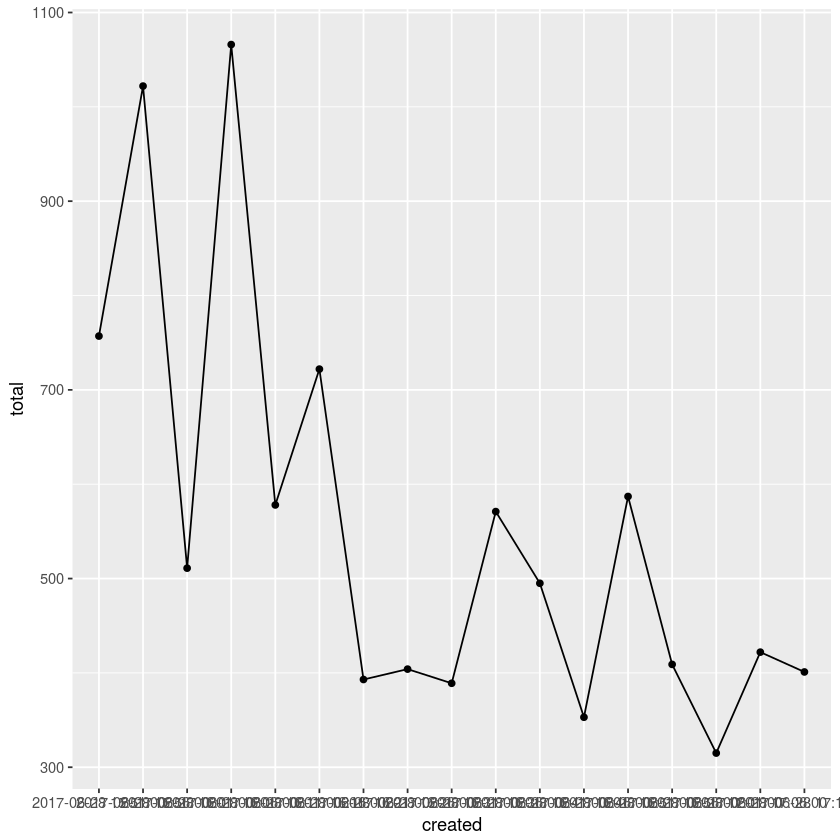

In [17]:
ggplot(ds_data, aes(x = created, y = total, group = 1)) + geom_line() + geom_point()

### 1b. Top ten users with more number of tweets

In [21]:
top10user <- head(ds_df[order(ds_df[,c("retweetCount")],decreasing = TRUE),],10)
top10user[,c("screenName","retweetCount")]

,screenName,retweetCount
385,Success_on1y,253
383,Success_on1y,233
380,Success_on1y,223
423,dasuma_es,215
139,wiomax_cn,204
214,StartUpRealTime,204
224,WIOMAX_DC,204
378,Success_on1y,151
192,_gopinathg,144
268,DabiBotsha,144


### 1c. Create a new column in the data itself, to identity total number of hashtags in each tweet

In [37]:
ds_df$total_hashtag = sapply(ds_df$text, function(x) str_count(x,"#(\\d|\\w)+"))
ds_df[,c("text","total_hashtag")]

text,total_hashtag
RT @Ronald_vanLoon: Internet of Things: A Transformational Force for the Insurance Industry | #DataScience #IoT #RT https://t.co/Ngm6RiC4X5…,3
RT @ccheron3: Understanding Internet of things #IoT #BigData #startup #Innovation #Datascience #SEO #Entrepreneur https://t.co/ORbnSQwPiW,7
RT @pradeeprao_: What is #IoT #Attack ? #CyberSecurity #infosec #DDoS #DataScience #Hacking #IIoT #fintech https://t.co/o9KJMnLcfT,9
RT @stephanenardin: #Infographic about #IoT #Startups #BigData #marketing #startup #Innovation #Datascience #mpgvip #SEO #defstar5 #Entrepr…,12
How #AI can be a force for good https://t.co/fPOAmnNWcs #Deeplearning #Machinelearning #DataScience #Spark #Hadoop #Cassandra #BigData #IoT,9
RT @Ronald_vanLoon: Internet of Things: A Transformational Force for the Insurance Industry | #DataScience #IoT #RT https://t.co/Ngm6RiC4X5…,3
"RT @Ronald_vanLoon: Hitchhiker's Guide to Data Science, Machine Learning, R, Python | #DataScience #MachineLearning #RT https://t.co/1LeYsw…",3
RT @TheDataAgent: What is a Pirate's favourite Statistical Programming Tool? RRRRRRRRR #datascience #data #analytics https://t.co/QvF6hzcRIO,3
RT @Rbloggers: Working with the xlsx package Exercises (part 2) https://t.co/FqYC8FnkFk #rstats #DataScience,2
Read The #BigData #DataScience #IoT #CustomerExperience Daily ▸ #rt #analytics https://t.co/AEexJ91g6b,6


In [7]:
tweets <- searchTwitter("@narendramodi", n=500, lang="en")
tweets_df = twListToDF(tweets)
tweets_df$text <- sapply(tweets_df$text, function(x) iconv(enc2utf8(x), sub = "byte"))

In [8]:
mach_corpus <- Corpus(VectorSource(tweets_df$text))
tdm <- TermDocumentMatrix(mach_corpus,
                         control = list(removePunctuation = TRUE,
                                        stopwords = c("narendramodi","https","pmoindia","amp","india","thank","will","two","programmes",stopwords("english")),
                                        removeNumbers = TRUE, tolower = TRUE))

In [9]:
m <- as.matrix(tdm)

In [10]:
word_freqs <- sort(rowSums(m), decreasing=TRUE)

In [11]:
dm <- data.frame(word=names(word_freqs), freq=word_freqs)

### 2a. Create a word cloud using the hashtags used in his tweets. (If you are not able to scrape more tweets, please use the data set which was shared already)

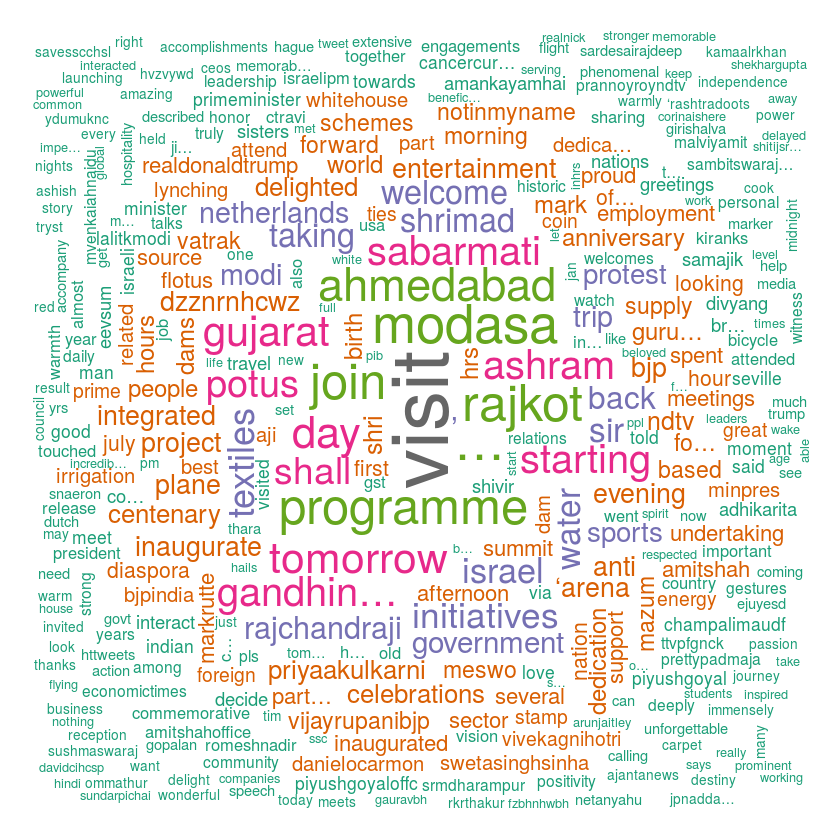

In [12]:
options(warn=-1)
wordcloud(dm$word, dm$freq, random.order=FALSE, colors=brewer.pal(8, "Dark2"))
options(warn=0)

In [13]:
tweet_data <- tweets_df[,c("screenName","retweetCount")]

In [14]:
top5hastag <- head(tweet_data[order(tweet_data[,c("retweetCount")],decreasing = TRUE),],5)

### 2b. For each quarter identify top 5 hashtags based on frequency. Represent them using bar charts (Tip: use facets)
Quarterly data wont be possible for now since Twitter API does not give past historical data so below I just plot top 5 hashtag based on Tweet counts

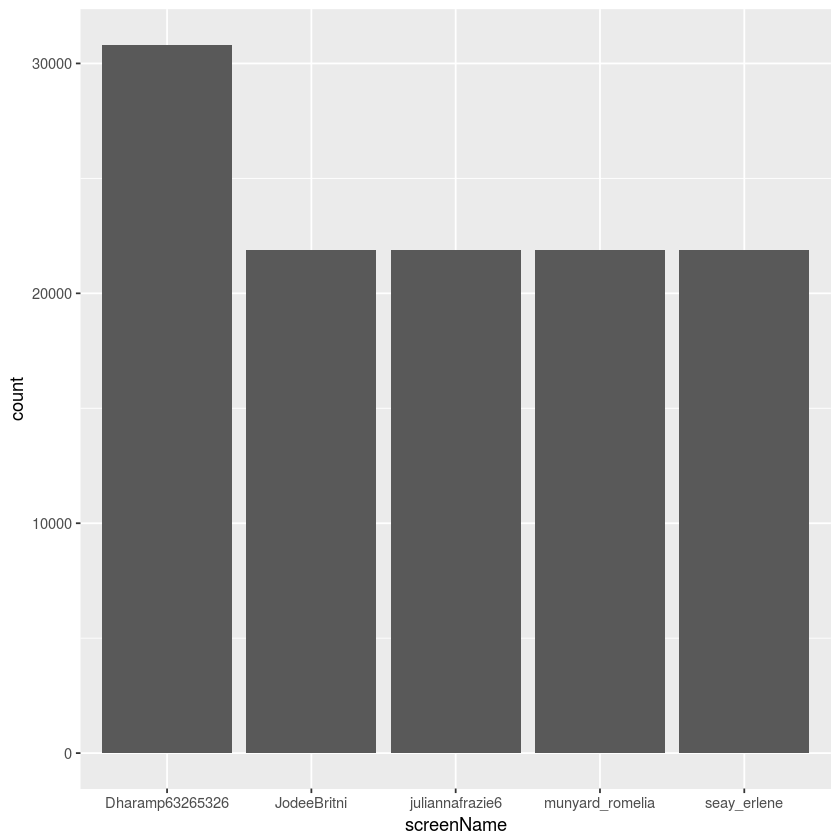

In [15]:
g <- ggplot(top5hastag, aes(screenName)) 
g + geom_bar(aes(weight = retweetCount))